# A Neural Network in just a few Lines of Python Code
## Design a Feed Forward Neural Network with Backpropagation

Today we will extend our artifical neuron, our perceptron, from the first part of this machine learning series. To solve non-linear classification problems, we need to combine this neuron to a network of neurons.

<img width="400" src="mlp_graph_latex_full.png" />

In the above picture you can see such a Multi Layer Perceptron (MLP) with one input layer, one hidden layer and one output layer. 

- The input layer represents the data set, each sample has three features ($x_0,x_1,x_2$)
- The hidden layer consists of five neurons ($h_1,h_2,h_3,h_4,h_5$)
- The output layer consists of one neuron ($o$).

## Give Me the Code!

In [200]:
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(x, derive=False):
    if derive:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

# Define the data set XOR
X = np.array([
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
    [0, 0, 1],
])

y = np.array([[0],
              [1],
              [1],
              [0]
             ])

# Define a learning rate
eta = 3
# Define the number of epochs for learning
epochs = 20000

# Initialize the weights with random numbers
w01 = np.random.random((len(X[0]), 5))
w12 = np.random.random((5, 1))

# Start feeding forward and backpropagate *epochs* times.
for epoch in range(epochs):
    # Feed forward
    z_h = np.dot(X, w01)
    a_h = sigmoid(z_h)

    z_o = np.dot(a_h, w12)
    a_o = sigmoid(z_o)

    # Calculate the error
    a_o_error = ((1 / 2) * (np.power((a_o - y), 2)))

    # Backpropagation
    ## Output layer
    delta_a_o_error = a_o - y
    delta_z_o = sigmoid(a_o,derive=True)
    delta_w12 = a_h
    delta_output_layer = np.dot(delta_w12.T,(delta_a_o_error * delta_z_o))

    ## Hidden layer
    delta_a_h = np.dot(delta_a_o_error * delta_z_o, w12.T)
    delta_z_h = sigmoid(a_h,derive=True)
    delta_w01 = X
    delta_hidden_layer = np.dot(delta_w01.T, delta_a_h * delta_z_h)

    w01 = w01 - eta * delta_hidden_layer
    w12 = w12 - eta * delta_output_layer

# Show the classification result for XOR
print(a_o)

[[ 0.00421882]
 [ 0.99645444]
 [ 0.99620151]
 [ 0.00195362]]


### Short Description of the Feed Forward Algorithm

The input values $x_0-x_2$ are now emited into the network. 

- Each neuron in the hidden layer $h_1-h_5$ gets the weighted sum of the input values as input $ z_{h_j} = \sum_{i=0}^3 x_i*w_{ji} $. 
- Each neuron calculates an output by using an activation function $a_h = \sigma(z_h)$.
- The same procedure is for the output layer neuron $O$. The ourput layer gets the weighted sum of the output values of the hidden layer $z_o = \sum_{i=1}^5 h_i*w_{1i}$.
- The output layer neuron calculates an output by using an activation function $a_o = \sigma(z_o)$. This is our final classification result.

Typical activation functions for neural networks are sigmoid, ReLU or tanh. In our case we will use <a href="https://en.wikipedia.org/wiki/Sigmoid_function">sigmoid</a>.

$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

Let us code the sigmoid function in python using numpy.

In [219]:
def sigmoid(x, derive=False):
    if derive:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

<div style="background-color: lightgreen; padding: 1em">
    <i>
    line <b>3</b>: The derivate of the sigmoid function. This we need later in the backpropagation.<br>
    line <b>4</b>: The sigmoid function as defined above.
    </i>
</div>

The output value finally gets the weighted sum of the output values of the hidden layer and finally calculates it output via an activation function. 

Sounds tough? Let us define some toy data set, to examplify this functionality with real numbers step by step.

## Our Ingredients 

First we will import numpy to easily manage linear algebra and calculus operations in python. To plot the learning progress later on, we will use matplotlib. The third line just allows matplotlib to plot the graphs directly in this jupyter notebook.

In [202]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Our Data Set

This time we want to classify non-linearly seperable problems, so we need to define a new data set. Typically toy data here is the XOR function.

In [203]:
X = np.array([
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
    [0, 0, 1],
])

y = np.array([[0],
              [1],
              [1],
              [0]
             ])

This small toy data set contains two samples labeled with $0$ and two samples labeled with $+1$. This means we have a binary classification problem, as the data set contains two sample classes. 


Like in the last tutorials we folded a bias term of $1$ into our samples.

Let us visualize the data set to clarify, that there is no way, to seperate the data with a linear hyperplane.

([<matplotlib.axis.YTick at 0x7fc5a2506438>,
 <a list of 2 Text yticklabel objects>)

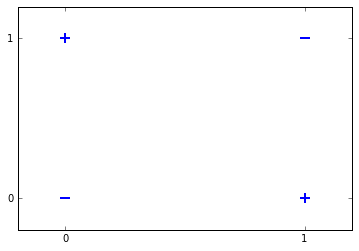

In [204]:
for d, sample in enumerate(X):
    # Plot the positive samples
    if d % 3 == 0:
        plt.scatter(sample[0], sample[1], s=100, marker='_', linewidths=2)
    # Plot the negative samples
    else:
        plt.scatter(sample[0], sample[1], s=90, marker='+', linewidths=2)

# Set the interval in axis
plt.xticks([0,1])
plt.yticks([0,1])

With the data set defined, we can now calculate the output using our neural network from the introduction.

First we need to make some preassumptions. 

As initial weight values we will use $1$. Usually neural networks use random values for initial weights, but for easy calculations, here we go with $1$. For the same reason the bias term of each neuron is $0$.
Furthermore we will set our learning rate $eta$ to $3$. 

In [205]:
# Note: Before you run this code for real use, change the np.ones to np.random.random!
# Otherwise the neural network might not minimize the error
w01 = np.ones((len(X[0]), 5))
w12 = np.ones((5, 1))

<div style="background-color: lightgreen; padding: 1em">
    <i>
    line <b>1</b>: Initialize the hidden layer weights with ones. Size of hidden layer is $5$.<br>
    line <b>2</b> Initialize the output layer weights with ones. Size of output layer is $1$.
    </i>
</div>

 

For each forward pass, we will use the whole data set for calculations. This allows us, to represent the network calculations via matrix multiplications.

*You will see, that the whole feed forward pass is all about matrix multiplications, so refresh your knowledge here, before you continue.*

### Feed Forward Pass

Let us start with the first step in the feed forward pass:

$$
\begin{pmatrix}
1 & 1 & 1\\
1 & 0 & 1\\
0 & 1 & 1\\
0 & 0 & 1
\end{pmatrix}
*
\begin{pmatrix}
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1
\end{pmatrix}
$$

The above term is a matrix representation of the feed forward pass from the input layer to the first hidden layer. Matrix multiplication is $row * column$. There is one row representing the input sample and five columns representing the neuron connections to the five hidden layer neurons.

The following matrix dimensions are involved:

$4x3 * 3x5 = 4x5$

The result is the following matrix, representing the values of $z_{h1}-z_{h5}$ as column vectors:

$$
\begin{pmatrix}
3 & 3 & 3 & 3 & 3 \\
2 & 2 & 2 & 2 & 2 \\
2 & 2 & 2 & 2 & 2 \\
1 & 1 & 1 & 1 & 1
\end{pmatrix}
$$

In [206]:
z_h = np.dot(X, w01)
print(z_h)

[[ 3.  3.  3.  3.  3.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.]
 [ 1.  1.  1.  1.  1.]]


<div style="background-color: lightgreen; padding: 1em">
    <i>
    line <b>1</b>: Calculate the input of the hidden layer $z_h$ using matrix multiplication.
    </i>
</div>

Now we use our sigmoid activation function for the hidden layer neurons. This will result in the following matrix representing the values of $a_{h1}-a_{h5}$:

$$
\begin{pmatrix}
0.952574 & 0.952574 & 0.952574 & 0.952574 & 0.952574 \\
0.880797 & 0.880797 & 0.880797 & 0.880797 & 0.880797 \\
0.880797 & 0.880797 & 0.880797 & 0.880797 & 0.880797 \\
0.731059 & 0.731059 & 0.731059 & 0.731059 & 0.731058
\end{pmatrix}
$$


In [207]:
a_h = sigmoid(z_h)
print(a_h)

[[ 0.95257413  0.95257413  0.95257413  0.95257413  0.95257413]
 [ 0.88079708  0.88079708  0.88079708  0.88079708  0.88079708]
 [ 0.88079708  0.88079708  0.88079708  0.88079708  0.88079708]
 [ 0.73105858  0.73105858  0.73105858  0.73105858  0.73105858]]


<div style="background-color: lightgreen; padding: 1em">
    <i>
    line <b>1</b>: Calculate the output of the hidden layer $a_h$ using sigmoid activation function.
    </i>
</div>

The above matrix represents the output of each of the five hidden layer neurons.
As we defined in our feed forward algorithm we will emitt this output now to the next layer as input using the weighted neuron connections of the output layer.

The following matrix dimensions are involved:

$4x5*5x1=4x1$


$$
\begin{pmatrix}
0.952574 & 0.952574 & 0.952574 & 0.952574 & 0.952574 \\
0.880797 & 0.880797 & 0.880797 & 0.880797 & 0.880797 \\
0.880797 & 0.880797 & 0.880797 & 0.880797 & 0.880797 \\
0.731059 & 0.731059 & 0.731059 & 0.731059 & 0.731058
\end{pmatrix}
*
\begin{pmatrix}
1 \\
1 \\
1 \\
1 \\
1 \\
\end{pmatrix}
$$

This results in the following matrix, representing the value $z_o$. Each row respresents $z_o$ for one input sample:

$$
\begin{pmatrix}
4.762870 \\
4.403985 \\
4.403985 \\
3.655293
\end{pmatrix}
$$

In [208]:
z_o = np.dot(a_h, w12)
print(z_o)

[[ 4.76287063]
 [ 4.40398539]
 [ 4.40398539]
 [ 3.65529289]]


<div style="background-color: lightgreen; padding: 1em">
    <i>
    line <b>1</b>: Calculate the input of the output layer $z_o$ using matrix multiplication.
    </i>
</div>

To get the output of the output layer we give this $4x1$ matrix to our activation function. The resulting matrix represents the values of $a_o$ for each input sample.


$$
\begin{pmatrix}
0.991531 \\
0.987919 \\
0.987919 \\
0.974798
\end{pmatrix}
$$

In [209]:
a_o = sigmoid(z_o)
print(a_o)

[[ 0.99153128]
 [ 0.98791922]
 [ 0.98791922]
 [ 0.97479766]]


<div style="background-color: lightgreen; padding: 1em">
    <i>
    line <b>1</b>: Calculate the output of the output layer $a_o$ using sigmoid activation function.
    </i>
</div>

### Calculating the Error of the Output Layer

As we have the final output for our whole data set, we can now calculate the error.

First we need to define our error function. As we need to derive the error function later on, we choose the squared error function:

$E_{a_o}(x)= \frac{1}{2}(f(x) - y_{x})^2$

Let us calculate the error for our first inpus sample $x_o$:

$$
E_{a_o}(x_0)= \frac{1}{2}(0.991531 - 0)^2 = 0.491567 \\
$$

Now we can calculate the error for the rest of the samples and write it down in matrix represantation.

$$
\begin{pmatrix}
0.491567\\
0.000073 \\
0.000073 \\
0.475116
\end{pmatrix}
$$

In [210]:
a_o_error = ((1 / 2) * (np.power((a_o - y), 2)))
print(a_o_error)

[[  4.91567136e-01]
 [  7.29725915e-05]
 [  7.29725915e-05]
 [  4.75115235e-01]]


<div style="background-color: lightgreen; padding: 1em">
    <i>
    line <b>1</b>: Calculate the error of the output neuron $a_o$ using squared error function.
    </i>
</div>

Now the magic of neural networks begins. As we calculated the error for each sample now, we want to adjust the weights in all the layers to minimize this error. This procedure is called backpropagation.

*Note: The error for $x_1$ and $x_2$ is almost zero. The calculated values of $a_o$ are $0.987919$, which is close to the expected value $y_{x_1}=1$ and $y_{x_2}=1$.*

### Backpropagation

The backward pass takes the error and passes it backward through the whole network, to find out, how much the weights have to be adapted, to minimize the error.

#### Calculate the Update Matrix for the Weights of the Output Layer

Let us visualize this step:

<img width="400" src="mlp_graph_latex_backprop_1.png" />

$$
\frac{\delta E}{\delta w12} = \frac{\delta E}{\delta a_{o}} * \frac{\delta a_{o}}{\delta z_{o}} * \frac{\delta z_{o}}{\delta w}
$$

Lets begin with the first backward step. We want to find out, how 
much the output of the output layer $a_o$ contributes to the error. We do this by deriving the error function with respect to the output of the output neuron $a_o$.

$$
\frac{\delta E}{\delta a_{o}} = 2*\frac{1}{2}(f(x) - y)^{2-1} \\
\frac{\delta E}{\delta a_{o}} = f(x) - y
$$

Now lets calculate the derivate for our error value from the first sample:

$$
\frac{\delta E(x_0)}{\delta a_{o}}= 0.9915317 - 0 = 0.991531 \\
$$
Now we can calculate the derivates for the error values from the rest of the data set and represent them as a $4x1$ matrix:
$$
\begin{pmatrix}
    0.991531 \\
    {-}0.012081 \\
    {-}0.012081\\
    0.974798
\end{pmatrix}
$$

In [211]:
delta_a_o_error = a_o - y
print(delta_a_o_error)

[[ 0.99153128]
 [-0.01208078]
 [-0.01208078]
 [ 0.97479766]]


<div style="background-color: lightgreen; padding: 1em">
    <i>
    line <b>1</b>: Calculate the derivate of the error of the output layer.
    </i>
</div>

The Derivates show us the slope (steepness) of the loss function at position x. If it is close to zero, the loss is small, higher values show a higher loss. EXPLANATION

Our next step in the backward pass is from the output of the output neuron $a_o$ to the input of the output neuron $z_o$. Here we "cross the border" of the sigmoid activation function. So we need the derivate of the sigmoid function:

$$
\frac{\delta a_{o}}{\delta z_{o}} = a_{o} * (1 - a_{o})
$$

Lets calculate this with our first value $x_0$ and represent the rest in matrix representation.

$$
\frac{\delta a_{o}}{\delta z_{o}} = 0.991531 * (1 - 0.991531) = 0.008398
$$

$$
\begin{pmatrix}
    0.008398 \\
    0.011935 \\
    0.011935 \\
    0.024567
\end{pmatrix}
$$

In [212]:
delta_z_o = sigmoid(a_o,derive=True)
print(delta_z_o)

[[ 0.008397  ]
 [ 0.01193483]
 [ 0.01193483]
 [ 0.02456719]]


<div style="background-color: lightgreen; padding: 1em">
    <i>
    line <b>1</b>: Calculate the derivate of the sigmoid function of the output layer.
    </i>
</div>

Our final step is, how much does the input of the output neuron $z_o$ change with respect to the weights $w_{11} - w_{15}$?

$$
z_{o} = w_{11}*a_{h_1} + w_{12}*a_{h_2} + w_{13}*a_{h_3} + w_{14}*a_{h_4} + w_{15}*a_{h_5}
$$

This we need to derive for all five weights:


$
\frac{\delta z_{o}}{\delta w_{11}} = 1 * a_{h_1} * w_{11}^{1-1} + 0 + 0 + 0 + 0 = a_{h_1}
$ 

$
\frac{\delta z_{o}}{\delta w_{12}} = 0 + 1 * a_{h_2} * w_{12}^{1-1} + 0 + 0 + 0 = a_{_2}
$

$
\frac{\delta z_{o}}{\delta w_{13}} = 0 + 0 + 1 * a_{h_3} * w_{13}^{1-1} + 0 + 0 = a_{h_3}
$

$
\frac{\delta z_{o}}{\delta w_{14}} = 0 + 0 + 0 + 1 * a_{h_4} * w_{14}^{1-1} + 0= a_{h_4}
$

$
\frac{\delta z_{o}}{\delta w_{15}} = 0 + 0 + 0 + 0 + 1 * a_{h_5} * w_{15}^{1-1} = a_{h_5}
$

The values for $a_{h}$ we already calculated in a previous step for all our samples. so we can copy them:

$$
\begin{pmatrix}
0.952574 & 0.952574 & 0.952574 & 0.952574 & 0.952574 \\
0.880797 & 0.880797 & 0.880797 & 0.880797 & 0.880797 \\
0.880797 & 0.880797 & 0.880797 & 0.880797 & 0.880797 \\
0.731059 & 0.731059 & 0.731059 & 0.731059 & 0.731058
\end{pmatrix}
$$

In [213]:
delta_w12 = a_h
print(a_h)

[[ 0.95257413  0.95257413  0.95257413  0.95257413  0.95257413]
 [ 0.88079708  0.88079708  0.88079708  0.88079708  0.88079708]
 [ 0.88079708  0.88079708  0.88079708  0.88079708  0.88079708]
 [ 0.73105858  0.73105858  0.73105858  0.73105858  0.73105858]]


<div style="background-color: lightgreen; padding: 1em">
    <i>
    line <b>1</b>: Calculate the derivate of the input of the output layer $z_o$ with respect to the weight $w_12$s.
    </i>
</div>

Now we can combine this all and calculate the gradients for our last layer in the MLP for each weight:

*Note: As we use matrix multiplication, we use transpose of matrices, to fit matrix dimensions. Furthermore we use element wise multiplication, respectively hadamard product, to calculate our update matrix. Click <a href="https://en.wikipedia.org/wiki/Hadamard_product_(matrices)">here</a>, for more informations*

$$
\frac{\delta E}{\delta w} = \frac{\delta z_{o}}{\delta w}.T * (\frac{\delta E}{\delta a_{o}} * \frac{\delta a_{o}}{\delta z_{o}})
$$

The terms $\frac{\delta E}{\delta a_{o}} and \frac{\delta a_{output}}{\delta z_{o}}$ are multiplied using the hadamard product. We get a $4x1$ matrice. This is the second factor of the matrix multiplication with the first term $\frac{\delta z_{o}}{\delta w}$ which we transpose to get a $5x4$ matrix.
    
$$
\frac{\delta E}{\delta w} =
\begin{pmatrix}
0.952574 & 0.952574 & 0.952574 & 0.952574 & 0.952574 \\
0.880797 & 0.880797 & 0.880797 & 0.880797 & 0.880797 \\
0.880797 & 0.880797 & 0.880797 & 0.880797 & 0.880797 \\
0.731059 & 0.731059 & 0.731059 & 0.731059 & 0.731058
\end{pmatrix}.T
*
\begin{pmatrix}
\begin{pmatrix}
    0.991531 \\
    - 0.012081 \\
    - 0.012081 \\
    0.974798
\end{pmatrix}
\circ
\begin{pmatrix}
    0.008398 \\
    0.011935 \\
    0.011935 \\
    0.024567
\end{pmatrix}
\end{pmatrix}
$$

The result is a $5x1$ matrice. If we calculate this, we will get the following gradient for the last layer:

$$
\begin{pmatrix}
0.025184 \\
0.025184 \\
0.025184 \\
0.025184 \\
0.025184 \\
\end{pmatrix}
$$

In [214]:
delta_output_layer = np.dot(delta_w12.T,(delta_a_o_error * delta_z_o))
print(delta_output_layer)

[[ 0.02518446]
 [ 0.02518446]
 [ 0.02518446]
 [ 0.02518446]
 [ 0.02518446]]


<div style="background-color: lightgreen; padding: 1em">
    <i>
    line <b>1</b>: Calculate the update matrix for the output layer using matrix multiplication and hadamard product.
    </i>
</div>

We will use this matrix, to update our weight vectors $w_{10}-w_{15}$.

#### Calculate the Update Matrix for the Weights of the Hidden Layer


As we calculated now the update vector for out weights $w_{11}-w_{15}$, we need to follow our backpass now further and calculate the updates for our weights $w_{01} - w_{10}$

$$
\frac{\delta E}{\delta w01} = \frac{\delta E}{\delta a_{h}} * \frac{\delta a_h}{\delta z_h} * \frac{\delta z_{h}}{\partial w}
$$

Ok, lets visualize this:

<img width="400" src="mlp_graph_latex_backprop_2.png" />

The first step:

$$
\frac{\delta E}{\delta a_{h}} = \frac{\delta E}{\delta z_{o}} * \frac{\delta z_{o}}{\delta a_{h}}
$$

The first term:

$$
\frac{\delta E}{\delta z_{o}} = \frac{\delta E}{\delta a_{o}} * \frac{\delta a_{o}}{\delta z_{o}}
$$

These values we know already from the last steps:

$$
\frac{\delta a_{o}}{\delta z_{o}} = \begin{pmatrix}
    0.008398 \\
    0.011935 \\
    0.011935 \\
    0.024567
\end{pmatrix}
$$

and

$$
\frac{\delta E}{\delta a_{o}} = \begin{pmatrix}
    0.991531 \\
    - 0.012081 \\
    - 0.012081 \\
    0.974798
\end{pmatrix}
$$

Multiplying them with hadamard product will produce:

$$
\begin{pmatrix}
    0.008327\\
    - 0.000144\\
    - 0.000144\\
    0.023948
\end{pmatrix}
$$

Now we can calculate the second term:

$$
z_o = w_{11}*a_{hidden} + w_{12}*a_{hidden} + w_{13}*a_{hidden} + w_{14}*a_{hidden} + w_{15}*a_{hidden}\\
\frac{\delta z_{o}}{\delta a_{h}} = w
$$

This gives us the matrix of the second weight vector:

$$
\begin{pmatrix}
1 \\
1 \\
1 \\
1 \\
1 \\
\end{pmatrix}
$$

Now we can calculate the full equation $\frac{\delta E}{\delta a_{h}}$. We have a $4x1$ matrix and a $5x1$ matrix, so we need to transpose the second term, so we get a $4x1 * 1x5 = 4x5$ matrice:

$$
\begin{pmatrix}
0.008327 \\
- 0.000144 \\
- 0.000144 \\
0.023948
\end{pmatrix}
*
\begin{pmatrix}
1 \\
1 \\
1 \\
1 \\
1 \\
\end{pmatrix}.T
=
\begin{pmatrix}
0.008326 & 0.008326 & 0.008326 & 0,008326 & 0,008326 \\
- 0.000144 & - 0.000144 & - 0.000144 & - 0.000144 & - 0.000144 \\
- 0.000144 & - 0.000144 & - 0.000144 & - 0.000144 & - 0.000144 \\
0.023948 & 0.023948 & 0.023948 & 0.023948 & 0.023948 
\end{pmatrix}
$$

In [215]:
delta_a_h = np.dot(delta_a_o_error * delta_z_o, w12.T)
print(delta_a_h)

[[ 0.00832589  0.00832589  0.00832589  0.00832589  0.00832589]
 [-0.00014418 -0.00014418 -0.00014418 -0.00014418 -0.00014418]
 [-0.00014418 -0.00014418 -0.00014418 -0.00014418 -0.00014418]
 [ 0.02394804  0.02394804  0.02394804  0.02394804  0.02394804]]


<div style="background-color: lightgreen; padding: 1em">
    <i>
    line <b>1</b>: Calculate the derivate of the Error function $E$ with respect to the output of the hidden layer $a_h$.
    </i>
</div>



Next we need to calculate

$$
\frac{\delta a_h}{\delta z_h} = a_h * (1-a_h)
$$

Lets write this into matrix representation for all samples and all hidden nodes

$$
\begin{pmatrix}
0.045177 & 0.045177 & 0.045177 & 0.045177 & 0.045177 \\
0.104993 & 0.104993 & 0.104993 & 0.104993 & 0.104993 \\
0.104993 & 0.104993 & 0.104993 & 0.104993 & 0.104993 \\
0.196612 & 0.196612 & 0.196612 & 0.196612 & 0.196612
\end{pmatrix}
$$

In [216]:
delta_z_h = sigmoid(a_h,derive=True)
print(delta_z_h)

[[ 0.04517666  0.04517666  0.04517666  0.04517666  0.04517666]
 [ 0.10499359  0.10499359  0.10499359  0.10499359  0.10499359]
 [ 0.10499359  0.10499359  0.10499359  0.10499359  0.10499359]
 [ 0.19661193  0.19661193  0.19661193  0.19661193  0.19661193]]


<div style="background-color: lightgreen; padding: 1em">
    <i>
    line <b>1</b>: Calculate the derivate of the sigmoid of the hidden layer.
    </i>
</div>

Finally we calculate:
$$
z_{h} = x_0 * w + x_1 * w
$$

$$
\frac{\delta z_{h}}{\partial w} = x 
$$

This is just our data set $X$:

$$
\begin{pmatrix}
1 & 1 & 1\\
1 & 0 & 1\\
0 & 1 & 1\\
0 & 0 & 1
\end{pmatrix}
$$

In [217]:
delta_w01 = X
print(X)

[[1 1 1]
 [1 0 1]
 [0 1 1]
 [0 0 1]]


<div style="background-color: lightgreen; padding: 1em">
    <i>
    line <b>1</b>: Calculate the derivate of the input of the hidden layer $z_h$ with respect to the weight matrix $w01$.
    </i>
</div>

Now, as we calculated all terms of $\frac{\delta E}{\delta w}$ we can multiply them all to get the update matrix.

As we have a $4x3 * 4x5$ structure, we need to transpose the matrix representing our input data $X$, to do matrix multiplication.

$$
\begin{pmatrix}
1 & 1 & 1\\
1 & 0 & 1\\
0 & 1 & 1\\
0 & 0 & 1
\end{pmatrix}.T
*
\begin{pmatrix}
\begin{pmatrix}
0.008327 & 0.008327 & 0.008327 & 0,008327 & 0,008327 \\
- 0.000144 & - 0.000144 & - 0.000144 & - 0.000144 & - 0.000144 \\
- 0.000144 & - 0.000144 & - 0.000144 & - 0.000144 & - 0.000144 \\
0.023948 & 0.023948 & 0.023948 & 0.023948 & 0.023948 
\end{pmatrix}
\circ
\begin{pmatrix}
0.045177 & 0.045177 & 0.045177 & 0.045177 & 0.045177 \\
0.104993 & 0.104993 & 0.104993 & 0.104993 & 0.104993 \\
0.104993 & 0.104993 & 0.104993 & 0.104993 & 0.104993 \\
0.196612 & 0.196612 & 0.196612 & 0.196612 & 0.196612
\end{pmatrix}
\end{pmatrix}
$$

After solving the hadamard product, we get:

$$
\begin{pmatrix}
1 & 1 & 1\\
1 & 0 & 1\\
0 & 1 & 1\\
0 & 0 & 1
\end{pmatrix}.T
*
\begin{pmatrix}
0.000376 & 0.000376 & 0.000376 & 0.000376 & 0.000376 \\
- 0.000015 & - 0.000015 & - 0.000015 & - 0.000015 & - 0.000015 \\
- 0.000015 & - 0.000015 & - 0.000015 & - 0.000015 & - 0.000015 \\
0.004708 & 0.004708 & 0.004708 & 0.004708 & 0.004708 \\
\end{pmatrix}
$$

The final $3x5$ update matrix will be:

$$
\begin{pmatrix}
0.000361 & 0.000361 & 0.000361 & 0.000361 & 0.000361 \\
0.000361 & 0.000361 & 0.000361 & 0.000361 & 0.000361 \\
0.00505433 & 0.00505433 & 0.00505433 & 0.00505433 & 0.00505433 \\
\end{pmatrix}
$$

In [218]:
delta_hidden_layer = np.dot(delta_w01.T, delta_a_h * delta_z_h)
print(delta_hidden_layer)

[[ 0.000361    0.000361    0.000361    0.000361    0.000361  ]
 [ 0.000361    0.000361    0.000361    0.000361    0.000361  ]
 [ 0.00505433  0.00505433  0.00505433  0.00505433  0.00505433]]


<div style="background-color: lightgreen; padding: 1em">
    <i>
    line <b>1</b>: Calculate the update matrix for the hidden layer using matrix multiplication and hadamard product.
    </i>
</div>

## Update the Weight Matrices

Now, that we calculated the update matrices, we can update our weight matrices $w01$ and $w12$.

$$
w12 = w12 - (eta * \frac{\delta E}{\delta w12})
$$

$$
w01 = w01 - (eta * \frac{\delta E}{\delta w01})
$$

Lets first calculate the weight matrix for the output layer

$$
w12 = 
\begin{pmatrix}
1 \\
1 \\
1 \\
1 \\
1 \\
\end{pmatrix}
- (3*
\begin{pmatrix}
0.025184 \\
0.025184 \\
0.025184 \\
0.025184 \\
0.025184 \\
\end{pmatrix}
) =
\begin{pmatrix}
0.92444663 \\
0.92444663 \\
0.92444663 \\
0.92444663 \\
0.92444663
\end{pmatrix}
$$

Now we can calculate our new weight matrix for the hidden layer:
    
$$
w01 = 
\begin{pmatrix}
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1
\end{pmatrix}
- (3*
\begin{pmatrix}
0.000361 & 0.000361 & 0.000361 & 0.000361 & 0.000361 \\
0.000361 & 0.000361 & 0.000361 & 0.000361 & 0.000361 \\
0.00505433 & 0.00505433 & 0.00505433 & 0.00505433 & 0.00505433 \\
\end{pmatrix} = 
\begin{pmatrix}
0.99891701 & 0.99891701 & 0.99891701 & 0.99891701 & 0.99891701 \\
0.99891701 & 0.99891701 & 0.99891701 & 0.99891701 & 0.99891701 \\
0.98483701 & 0.98483701 & 0.98483701 & 0.98483701 & 0.98483701
\end{pmatrix}
$$

Voila, these are our new weight matrices. 

### Make a Prediction with updated Weight Matrices

Let us classify our data set with the new weights.

$$
a_h = \sigma (
\begin{pmatrix}
1 & 1 & 1\\
1 & 0 & 1\\
0 & 1 & 1\\
0 & 0 & 1
\end{pmatrix}
*
\begin{pmatrix}
0.99891701 & 0.99891701 & 0.99891701 & 0.99891701 & 0.99891701 \\
0.99891701 & 0.99891701 & 0.99891701 & 0.99891701 & 0.99891701 \\
0.98483701 & 0.98483701 & 0.98483701 & 0.98483701 & 0.98483701
\end{pmatrix} )
=
\begin{pmatrix}
0.95178509  & 0.95178509 & 0.95178509 & 0.95178509 & 0.95178509 \\
0.87908077  & 0.87908077 & 0.87908077 & 0.87908077 & 0.87908077 \\
0.87908077  & 0.87908077 & 0.87908077 & 0.87908077 & 0.87908077 \\
0.72806693  & 0.72806693 & 0.72806693 & 0.72806693 & 0.72806693
\end{pmatrix}
$$

$$
a_o = \sigma(
\begin{pmatrix}
0.95178509  & 0.95178509 & 0.95178509 & 0.95178509 & 0.95178509 \\
0.87908077  & 0.87908077 & 0.87908077 & 0.87908077 & 0.87908077 \\
0.87908077  & 0.87908077 & 0.87908077 & 0.87908077 & 0.87908077 \\
0.72806693  & 0.72806693 & 0.72806693 & 0.72806693 & 0.72806693
\end{pmatrix}
*
\begin{pmatrix}
0.92444663 \\
0.92444663 \\
0.92444663 \\
0.92444663 \\
0.92444663
\end{pmatrix})
=
\begin{pmatrix}
0.98786405 \\
0.98309866 \\
0.98309866 \\
0.96660214
\end{pmatrix})
$$

Did we improve a bit in comparison to the first prediction?

$a_o$ after first prediction =

$$
\begin{pmatrix}
0.991531 \\
0.987919 \\
0.987919 \\
0.974798
\end{pmatrix}
$$

$a_o$ after the second (with updated weights) prediction =

$$
\begin{pmatrix}
0.98786405 \\
0.98309866 \\
0.98309866 \\
0.96660214
\end{pmatrix})
$$

Thats not very impressive, right? But that is a typical behaviour of neural networks, they need to do these update operations very, very often. With random initialized weight matrices, a learning rate $eta=3$ and 20000 epochs of feeding forward and backpropagation, we will already have a much better result of $a_o$:

$$
\begin{pmatrix}
0.00349888 \\
0.99565532 \\
0.99728676 \\
0.00382784
\end{pmatrix}
$$

Not bad right?

Congratulations! If you made it so far, a neural network is a bit less of a black box for you now. I hope you learnt something and could follow all this matrix multiplication. If you find any bugs in the code or other mistakes, just leave me a note in the comments.

Phillip from webstudio